In [1]:
%%time
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import six
%matplotlib inline

import flotilla


folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
outrigger_folder = '{}/outrigger_index'.format(folder)

csv_folder = '{}/csvs_for_paper'.format(folder)

metadata = pd.read_csv('{}/metadata.csv'.format(csv_folder), index_col=0)
expression = pd.read_csv('{}/expression.csv'.format(csv_folder), index_col=0)
mapping_stats = pd.read_csv('{}/mapping_stats.csv'.format(csv_folder), index_col=0)

splicing = pd.read_csv('{}/psi.csv'.format(outrigger_folder), index_col=0)


six.print_('metadata.shape', metadata.shape)
six.print_('expression.shape', expression.shape)
six.print_('mapping_stats.shape', mapping_stats.shape)
six.print_('splicing.shape', splicing.shape)

metadata.shape (214, 9)
expression.shape (214, 34608)
mapping_stats.shape (214, 35)
splicing.shape (242, 43903)
CPU times: user 17.5 s, sys: 861 ms, total: 18.4 s
Wall time: 19.4 s


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
splicing_feature_data = pd.read_csv('{}/splicing_feature_data.csv'.format(csv_folder), index_col=0)
six.print_(splicing_feature_data.shape)
splicing_feature_data.head()

(36531, 26)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,...,junction12,junction13,junction23,junction24,junction34,strand,transcript_id,exon2_divisible_by_3,one_ensembl_id,splice_type
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,NaN,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,...,chr10:100189647-100190327:-,chr10:100189400-100190327:-,chr10:100189400-100189547:-,NaN,NaN,-,"ENST00000361490.4,ENST00000414009.1,ENST000003...",True,ENSG00000107521,SE
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,NaN,only one,NaN,only one,ENSG00000107521,exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,...,chr10:100191049-100193696:-,chr10:100190428-100193696:-,chr10:100190428-100190887:-,NaN,NaN,-,"ENST00000361490.4,ENST00000414009.1,ENST000003...",False,ENSG00000107521,SE
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,NaN,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,...,chr10:100195172-100195391:-,chr10:100193849-100195391:-,chr10:100193849-100195028:-,NaN,NaN,-,"ENST00000361490.4,ENST00000325103.6,ENST000004...",False,ENSG00000107521,SE
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,NaN,only one,NaN,only one,ENSG00000120053,exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,...,chr10:101163632-101165512:-,chr10:101163392-101165512:-,chr10:101163392-101163480:-,NaN,NaN,-,"ENST00000543866.1,ENST00000370508.5",False,ENSG00000120053,SE
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+,NaN,only one,NaN,only one,ENSG00000198018,exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,...,chr10:101419346-101419618:+,chr10:101419346-101421202:+,chr10:101419722-101421202:+,NaN,NaN,+,ENST00000370489.4,False,ENSG00000198018,SE


## Create a flotilla study!

2016-05-13 07:45:54	Initializing Study
2016-05-13 07:45:54	Initializing Predictor configuration manager for Study
2016-05-13 07:45:54	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-05-13 07:45:54	Added ExtraTreesClassifier to default predictors
2016-05-13 07:45:54	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-05-13 07:45:54	Added ExtraTreesRegressor to default predictors
2016-05-13 07:45:54	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-05-13 07:45:54	Added GradientBoostingClassifier to default predictors
2016-05-13 07:45:54	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2016-05-13 07:45:54	Added GradientBoostingRegressor to default predictors
2016-05-13 07:45:54	Loading metadata
2016-05-13 07:45:54	Loading species metadata from ~/f

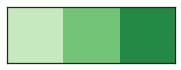

In [3]:
%matplotlib inline

greens = map(mpl.colors.rgb2hex, sns.color_palette('Greens', n_colors=3))
sns.palplot(greens)

lightgreen, mediumgreen, darkgreen = greens

phenotype_to_color = {'MN': greens[2],
                      'NPC': greens[1],
                      'iPSC': greens[0]}
phenotype_to_marker = {'MN': 's',    # square
                       'NPC': '^',   # Triangle
                       'iPSC': 'o'}  # circle
metadata_phenotype_order = ('iPSC', 'NPC', 'MN')

min_samples = 10

study = flotilla.Study(metadata, expression_data=expression, expression_log_base=2, 
                       expression_plus_one=True,
                       expression_thresh=1,
                       splicing_data=splicing,
                      
                       # At least 10 samples per feature (either gene or splicing event)
                       metadata_minimum_samples=min_samples, 
                       mapping_stats_data=mapping_stats,
                       mapping_stats_min_reads=1e6,
                       mapping_stats_number_mapped_col='Uniquely mapped reads number',
                       metadata_phenotype_order=('iPSC', 'NPC', 'MN'), 
                       metadata_phenotype_to_marker=phenotype_to_marker,
                       metadata_phenotype_to_color=phenotype_to_color,
                       species='hg19')

# Set the curated splicing feature data
study.splicing.feature_data = splicing_feature_data

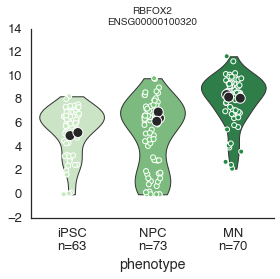

In [4]:
study.plot_gene('RBFOX2')

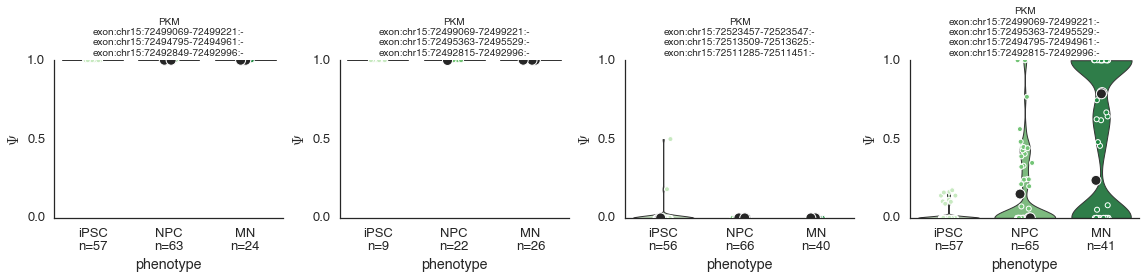

In [5]:
study.plot_event("PKM")

## Save the study!

In [6]:
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study.save('singlecell_pnm', flotilla_dir=flotilla_dir)

Wrote datapackage to /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm/datapackage.json
